<a href="https://colab.research.google.com/github/AlejandroGuedez/Equipo-23-de-Diplomado-data-scientist/blob/Versiones/IntroML_Lab1_Grupo_23_Lau_20220605.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 1: Regresión en Boston**
En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [227]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos
Cargamos el conjunto de datos y vemos su contenido.

In [228]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [229]:
print(boston['DESCR'])   # descripción del dataset
# print(boston['data'])           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [230]:
boston['data'].shape, boston['target'].shape


((506, 13), (506,))

## División en Entrenamiento y Evaluación
Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [231]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea
Responda las siguientes preguntas:

1.   ¿De qué se trata el conjunto de datos?
2.   ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3.   ¿Qué información (atributos) hay disponibles para hacer la predicción?
4.   ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5.   ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

<strong>No hace falta escribir código para responder estas preguntas.

Respuestas

1.   El dataset tiene datos de 506 casas de Boston, sus precios y otras 13 características que se quiere ver si ayudan a explicar el comportamiento de los precios. 
2.   La variable a predecir es MEDV, que es la mediana del valor de viviendas en propiedad (en miles de dólares).
3.   Hay 13 atributos que podrían ser usados para hacer la predicción, a saber:

> <small><margin>01- CRIM: Índice de criminalidad per capita<br>
> 02- ZN: Proporción de superficie residencial establecida en lotes mayores de 25.000 sq.ft (equivalente a 2.223 metros cuadrados).<br>
> 03- INDUS: Proporción de superficie de negocio no minorista.<br>
> 04- CHAS: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso)<br>
> 05- NOX: Concentración de óxidos de nitrógeno (partes por 10 millones)<br>
> 06- RM: Número promedio de habitaciones por vivienda<br>
> 07- AGE: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940<br>
> 08- DIS: Distancias ponderadas a cinco centros de empleo de Boston<br>
> 09- RAD: Índice de accesibilidad a las autopistas radiales<br>
> 10- TAX: Parte del impuesto de bienes inmuebles por cada 10.000 $ de propiedad.<br>
> 11- PTRATIO: Ratio de alumnos por profesor<br>
> 12- B: Se calcula como 1000(Bk — 0.63)², donde Bk es la proporción de personas de descendencia Afroamericana<br>
> 13- LSTAT: Porcentaje de población de “estatus de bajo nivel”

4.   Leyendo las descripciones de las variables, pareciera que las más determinantes serán índice de criminalidad (CRIM), distancia a centros de empleo (DIS) y número promedio de habitaciones por vivienda (RM).
5.   La variable B asume que la auto-segregación racial podría generar un impacto en el precio de las viviendas, lo cual generaría sesgo racial en el análisis. Además, la variable LSTAT podría ser discutible en función a la definición subjetiva de qué se considera como "estatus de bajo nivel".

## Ejercicio 2: Visualización de los Datos
1.   Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2.   Estudie las gráficas, identificando <strong>a ojo</strong> los atributos que a su criterio sean los más informativos para la predicción.
3.   Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

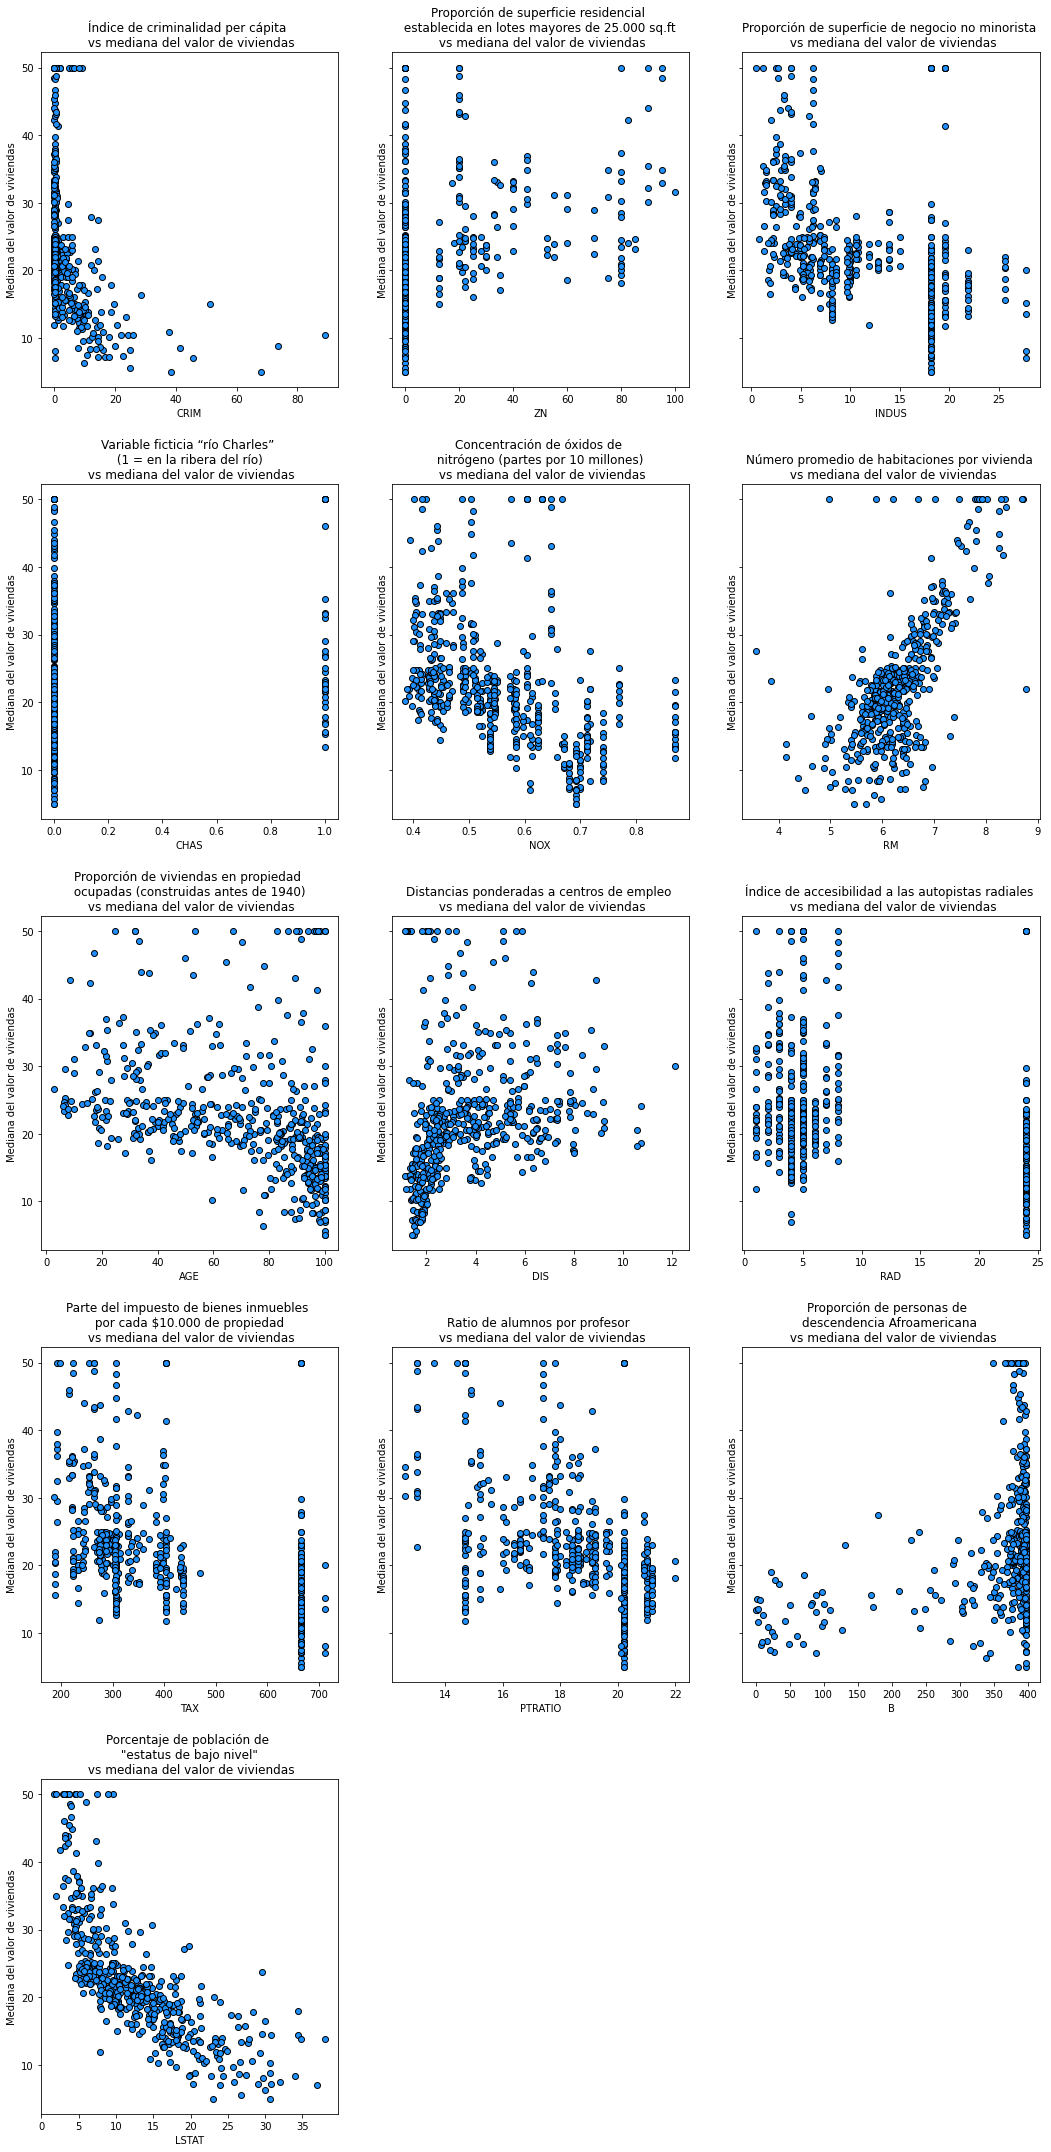

In [232]:
fig, ax = plt.subplots(5, 3, figsize=(15,30), sharey=True)

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

ax[0,0].scatter(X[:, (boston['feature_names'] == features[0])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[0,0].set_xlabel(features[0])
ax[0,0].set_ylabel("Mediana del valor de viviendas")
ax[0,0].set_title('Índice de criminalidad per cápita \n vs mediana del valor de viviendas')

ax[0,1].scatter(X[:, (boston['feature_names'] == features[1])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[0,1].set_xlabel(features[1])
ax[0,1].set_ylabel("Mediana del valor de viviendas")
ax[0,1].set_title('Proporción de superficie residencial \n establecida en lotes mayores de 25.000 sq.ft \n vs mediana del valor de viviendas')

ax[0,2].scatter(X[:, (boston['feature_names'] == features[2])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[0,2].set_xlabel(features[2])
ax[0,2].set_ylabel("Mediana del valor de viviendas")
ax[0,2].set_title('Proporción de superficie de negocio no minorista \n vs mediana del valor de viviendas')

ax[1,0].scatter(X[:, (boston['feature_names'] == features[3])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[1,0].set_xlabel(features[3])
ax[1,0].set_ylabel("Mediana del valor de viviendas")
ax[1,0].set_title('Variable ficticia “río Charles” \n (1 = en la ribera del río) \n vs mediana del valor de viviendas')

ax[1,1].scatter(X[:, (boston['feature_names'] == features[4])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[1,1].set_xlabel(features[4])
ax[1,1].set_ylabel("Mediana del valor de viviendas")
ax[1,1].set_title('Concentración de óxidos de \n nitrógeno (partes por 10 millones) \n vs mediana del valor de viviendas')

ax[1,2].scatter(X[:, (boston['feature_names'] == features[5])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[1,2].set_xlabel(features[5])
ax[1,2].set_ylabel("Mediana del valor de viviendas")
ax[1,2].set_title('Número promedio de habitaciones por vivienda \n vs mediana del valor de viviendas')

ax[2,0].scatter(X[:, (boston['feature_names'] == features[6])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[2,0].set_xlabel(features[6])
ax[2,0].set_ylabel("Mediana del valor de viviendas")
ax[2,0].set_title('Proporción de viviendas en propiedad \n ocupadas (construidas antes de 1940) \n vs mediana del valor de viviendas')

ax[2,1].scatter(X[:, (boston['feature_names'] == features[7])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[2,1].set_xlabel(features[7])
ax[2,1].set_ylabel("Mediana del valor de viviendas")
ax[2,1].set_title('Distancias ponderadas a centros de empleo \n vs mediana del valor de viviendas')

ax[2,2].scatter(X[:, (boston['feature_names'] == features[8])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[2,2].set_xlabel(features[8])
ax[2,2].set_ylabel("Mediana del valor de viviendas")
ax[2,2].set_title('Índice de accesibilidad a las autopistas radiales \n vs mediana del valor de viviendas')

ax[3,0].scatter(X[:, (boston['feature_names'] == features[9])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[3,0].set_xlabel(features[9])
ax[3,0].set_ylabel("Mediana del valor de viviendas")
ax[3,0].set_title('Parte del impuesto de bienes inmuebles \n por cada $10.000 de propiedad \n vs mediana del valor de viviendas')

ax[3,1].scatter(X[:, (boston['feature_names'] == features[10])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[3,1].set_xlabel(features[10])
ax[3,1].set_ylabel("Mediana del valor de viviendas")
ax[3,1].set_title('Ratio de alumnos por profesor \n vs mediana del valor de viviendas')

ax[3,2].scatter(X[:, (boston['feature_names'] == features[11])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[3,2].set_xlabel(features[11])
ax[3,2].set_ylabel("Mediana del valor de viviendas")
ax[3,2].set_title('Proporción de personas de  \ndescendencia Afroamericana \n vs mediana del valor de viviendas')

ax[4,0].scatter(X[:, (boston['feature_names'] == features[12])], y, facecolor="dodgerblue", edgecolor="k", label="datos")
ax[4,0].set_xlabel(features[12])
ax[4,0].set_ylabel("Mediana del valor de viviendas")
ax[4,0].set_title('Porcentaje de población de \n "estatus de bajo nivel" \n vs mediana del valor de viviendas')

ax[4,1].set_axis_off()
ax[4,2].set_axis_off()

fig.tight_layout(h_pad=2)
plt.show()


## Ejercicio 3: Regresión Lineal
1.   Seleccione <strong>un solo atributo</strong> que considere puede ser el más apropiado.
1.   Instancie una regresión lineal de <strong>scikit-learn</strong>, y entrénela usando sólo el atributo seleccionado.
1.   Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
1.   Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
1.   Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

<strong>Observación:</strong> Con algunos atributos se puede obtener un error en test menor a 50.

In [233]:
# Se selecciona el atributo 'RM'
feature = 'RM' 
selector = (boston['feature_names'] == feature)
X_train_rm = X_train[:, selector]
X_test_rm = X_test[:, selector]
X_train_rm.shape, X_test_rm.shape

((404, 1), (102, 1))

In [234]:
# Se definen algunas funciones que servirán para instanciar y predecir
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias (1, x)
    return X_b.dot(w)


In [235]:
# Se instancia y entrena la regresión lineal usando el atributo seleccionado
w = linear_least_squares(X_train_rm.flatten(), y_train)
print(w)

[  9.37638431 -36.47618963]


In [236]:
# Se obtienen los valores predichos para los datos de y de evaluación.
y_train_pred = f(X_train_rm.flatten(), w)
y_test_pred = f(X_test_rm.flatten(), w)

In [237]:
# Se calcula el error cuadrático medio sobre ambos conjuntos de datos.

from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 42.820479
Test error: 46.907352


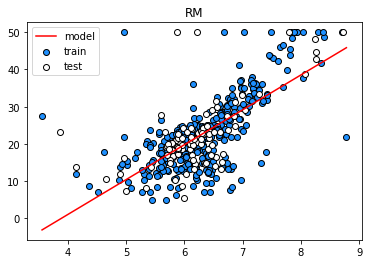

In [238]:
# Se grafica modelo resultante
x_start = min(np.min(X_train_rm.flatten()), np.min(X_test_rm))
x_end = max(np.max(X_train_rm.flatten()), np.max(X_test_rm))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")
plt.plot(x.flatten(), f(x.flatten(), w), color="red", label="model")

plt.scatter(X_train_rm, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_rm, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial
En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando scikit-learn.

Deben usar <strong>el mismo atributo</strong> seleccionado para el ejercicio anterior.

1.   Para varios grados de polinomio, haga lo siguiente:

      *   Instancie y entrene una regresión polinomial.
      *   Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
      *   Guarde los errores en una lista.
1.   Grafique las curvas de error en términos del grado del polinomio.
1.   Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
1.   Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
1.   Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

<strong>Observación:</strong> Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [239]:
# 1. Resolver acá.

In [240]:
# 2. Graficar curvas de error acá.

In [241]:
# 4. Reconstruir mejor modelo acá y graficar.

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)


In [243]:
model.fit(X_train_rm, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [244]:
# Inspección de los coeficientes del modelo
lr.coef_

array([ 68.20229886, -23.56509374,   2.56037958])

In [245]:
lr.intercept_

0.0

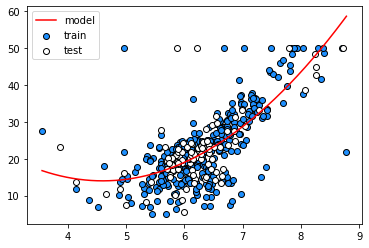

In [246]:
# Grafico del resultado

plt.scatter(X_train_rm, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_rm, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

In [247]:
degree = 3
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  
model = make_pipeline(pf, lr)
model.fit(X_train_rm, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [248]:
lr.coef_

array([ 274.12931892, -124.87102604,   18.86964785,   -0.85958803])

In [249]:
lr.intercept_

0.0

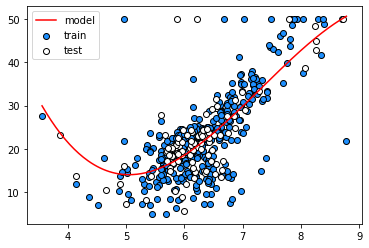

In [250]:

plt.scatter(X_train_rm, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_rm, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

In [251]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_rm, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_rm)
    y_test_pred = model.predict(X_test_rm)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [252]:
train_errors, test_errors

([85.1437202235075,
  42.82047894172751,
  37.74552897028125,
  36.395658757671086,
  34.808446256913214,
  33.131121571949116,
  33.13011641557084,
  33.06035876459896,
  33.06035722589541,
  32.8548843047318],
 [81.58231743908232,
  46.9073516273953,
  39.794731163726546,
  39.82576208821606,
  41.553925676028065,
  41.038288578720795,
  41.0091769653148,
  42.394110713112596,
  42.39922618997137,
  46.039030275360616])

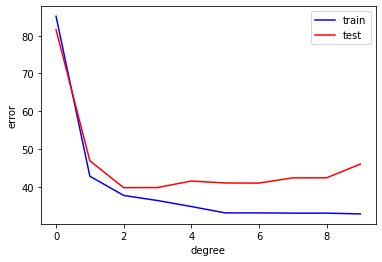

In [253]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

De acuerdo a esta gráfica, el modelo que mejor ajusta los datos es el de grado 3, ya que entre el polinomio de grado 2 y 3 disminuye el error en entrenamiento y el error en evaluación se mantiene constante, y a partir del grado 3 este último comienza a aumentar.

## Ejercicio 5: Regresión con más de un Atributo
En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1.   Seleccione <strong>dos o tres atributos</strong> entre los más relevantes encontrados en el ejercicio 2.
2.   Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3.   Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [268]:
# Se eligen 3 variables: RM, CRIM y LSTAT
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [ ]:
# 2. Resolver acá.

In [269]:
lr = LinearRegression(fit_intercept=False)  
model=lr.fit(X_train_fs,y_train)

In [270]:
# predict:
y_train_pred = model.predict(X_train_fs)
y_test_pred = model.predict(X_test_fs)
    
# evaluate:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

In [274]:
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 27.853195
Test error: 38.615520


In [272]:
test_error

38.61551997624763

## Más ejercicios (opcionales)
### Ejercicio 6: A Todo Feature
Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización
Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?